<a href="https://colab.research.google.com/github/Angelaruiga/python_/blob/main/Caso_practico_1_ARG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso Práctico 1º.

### Eligiendo Turno de Trabajo en la Cafeteria

Responde las preguntas y argumenta.

**0. Carga el dataset de SEABORN de "TIPS"**

## Instalar las librerias

In [72]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [73]:
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [74]:
# otras librerías que vamos a necesitar

import datetime
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [75]:
# cargar el df conjunto de datos 'tips' desde el repositorio de datos de Seaborn.

df = sns.load_dataset("tips") # carga el conjunto de datos 'tips' desde el repositorio de datos de Seaborn.
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [76]:
# explorar los datos
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

## **1. ¿Qué día de trabajo es el favorito de los clientes?**

In [77]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [78]:
# Preparación del Dato.
df_day = df.groupby(by=['day'], as_index=False) \
       .agg(Clientes=('total_bill', 'size'))
df_day

,day,Clientes
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


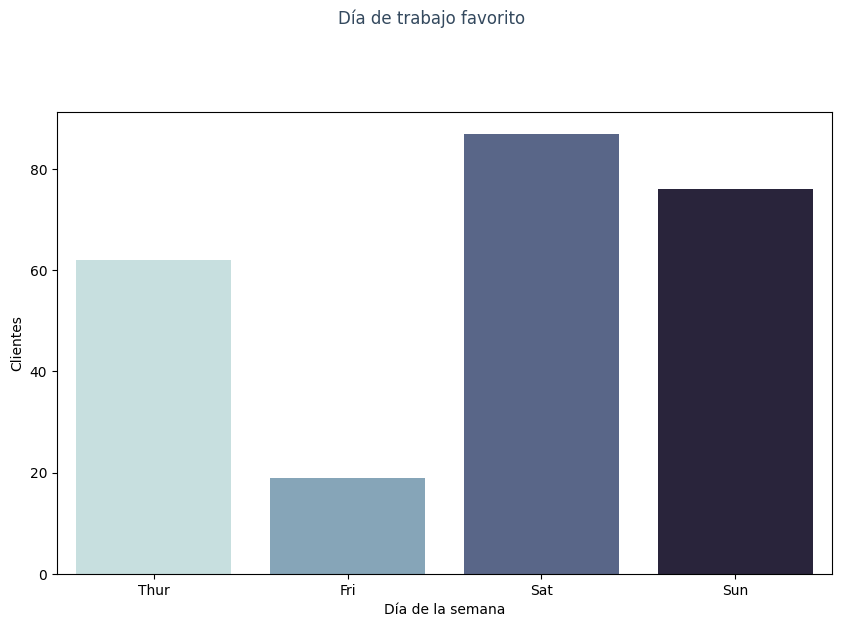

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='Clientes',data=df_day, palette= "ch:start=.2,rot=-.3")
plt.xlabel('Día de la semana')
plt.ylabel('Clientes')
font_title = {'family': 'sans-serif', 'color':  '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle('Día de trabajo favorito',y=1.05, fontdict=font_title)
plt.show()

Respuesta: El día qué mas clientes recibe es el Sabado


## **2. ¿Que dia de la semana tiene más mujeres que hombres como clientes?**

Preparación del dato

In [80]:
#Preparamos el dato para agregar a nuestro gráfico la variable "Clientes"
df_género = df.groupby(by=['sex','day'], as_index=False) \
      .agg(Clientes=('total_bill', 'size')).reset_index()  # Alinear las columnas por si lo visualizamos



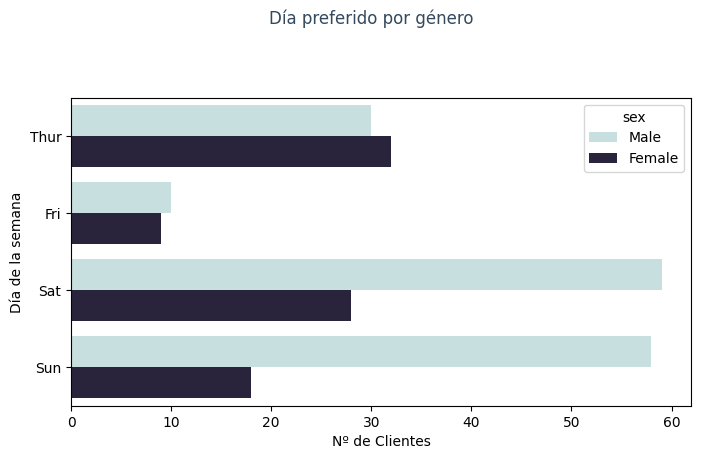

In [81]:
#otra forma de visualización que se aprecia más rápido cuál es el día preferido por género
plt.figure(figsize=(8,4))
sns.barplot(data=df_género, y='day', x= 'Clientes', hue='sex', palette= "ch:start=.2,rot=-.3")
plt.xlabel('Nº de Clientes')
plt.ylabel('Día de la semana')
font_title = {'family': 'sans-serif', 'color':  '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle('Día preferido por género',x=0.5, y=1.10, fontdict=font_title)
plt.show()

Respuesta: El dia preferido de los hombres es el sabado y el dia preferido de las mujeres el jueves

## **3. ¿Crees que el hecho de ser fumador influye considerablemente en el total  de la cuenta?**



In [82]:
#vamos hacer un conteo para ver si hay más clientes fumadores o no fumadores
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

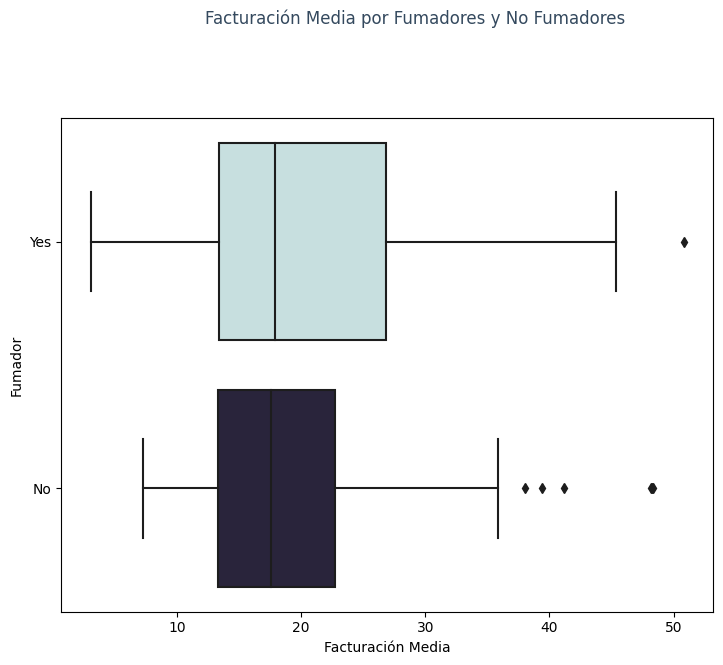

In [83]:
# No hacemos preparación al dato ya que no sabemos si la facturación total o la facturación media influye significativamente para obtener la iformación, entonces para ello, para evitar demasiados cálculos hacemos el gráfico Boxplot que nos da inforamción de la mediana, Quartiles y Outliers
plt.figure(figsize=(14, 6))

# Gráfico de caja
plt.subplot(1, 2, 1) #, el primer argumento 1 indica que hay una fila de gráficos, el segundo argumento 2 indica que hay dos columnas de gráficos, y el tercer argumento 1 indica que este es el primer gráfico.
sns.boxplot( y='smoker',x='total_bill', palette="ch:start=.2,rot=-.3",data=df)
plt.xlabel('Facturación Media')
plt.ylabel('Fumador')
font_title = {'family': 'sans-serif', 'color':  '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle('Facturación Media por Fumadores y No Fumadores',x=0.3, y=1.10, fontdict=font_title)

plt.tight_layout()
plt.show()


Respuesta:

- Según el gráfico creo que el hecho de ser fumador influye considerablemente  en el total de la cuenta. Por el siguiente motivio, la caja de bigotes para los fumadores tiene un rango mucho mayor que la caja de bigotes para los no fumadores. Esto significa que hay una mayor variabilidad en la facturación media de los fumadores.

- Además, la mediana de la facturación media parece que para los fumadores es un poco superior a la mediana de la facturación media para los no fumadores. Esto significa que, en promedio, los fumadores gastan más que los no fumadores.

## **4. ¿Esta el total de la cuenta relacionado con la propina?**

In [84]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.1, 'Propina respecto al total pagado por comida')

<Figure size 1400x600 with 0 Axes>

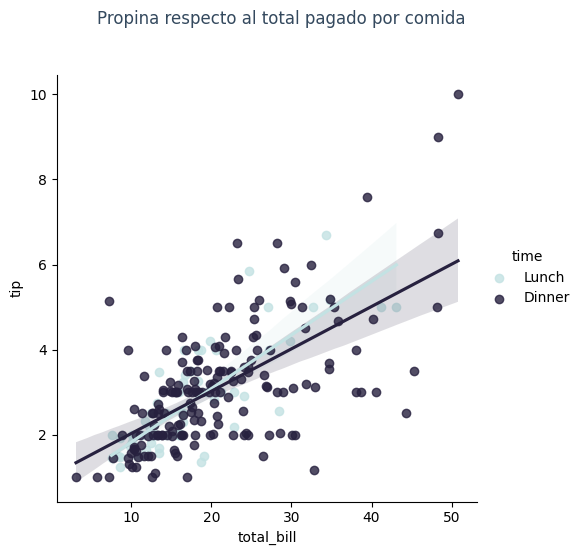

In [85]:
# Crear gráfico Limplot para ver si existe correlación entre facturación total con la propina
# visualizamos si por la cena o comidas gastan más y dejan más propinas
plt.figure(figsize=(14, 6))
sns.lmplot(x = "total_bill", y="tip", data=df, hue="time",palette="ch:start=.2,rot=-.3")
font_title = {'family': 'sans-serif', 'color':  '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle("Propina respecto al total pagado por comida", y=1.10, fontdict=font_title)

Respuesta: A mayor gasto mayor es la propina en terminos generales.
- La línea de regresión muestra una correlación positiva entre el total de la cuenta y la propina, lo que indica que a medida que aumenta el total de la cuenta, también lo hace la propina. Por tanto, las propinas tienden a ser más altas para las cuentas más altas,
- Además, se observa que hay mayor concentración en la cena por tanto parece que en este turno dejan una mejor propina

#### Otras hipotesis que se me planteanm:
- 1 Relación entre la propina y la cuenta según tipo fumador
- 2 Relación entre la propina y la cuenta según el género
- 3 Relación entre la propina y la cuenta según el número de comensales

<Figure size 1400x600 with 0 Axes>

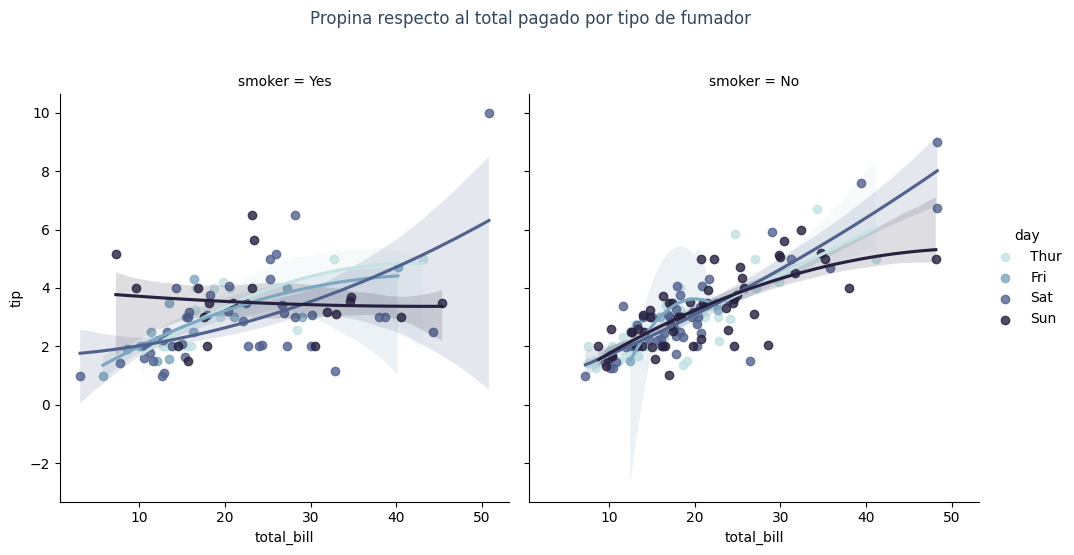

In [86]:
# Crear gráfico Limplot para ver si existe correlación entre facturación total con la propina
# visualizamos si dejan más propinas los fumadores o no fumadores

plt.figure(figsize=(14, 6))
sns.lmplot(x = "total_bill", y="tip", data=df, hue='day',col='smoker',order=2, ci=80, palette="ch:start=.2,rot=-.3")
font_title = {'family': 'sans-serif', 'color': '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle("Propina respecto al total pagado por tipo de fumador", y=1.10, fontdict=font_title)

# Muestra el gráfico
plt.show()

- Existe una correlación positiva entre la cuenta total y la propina para ambos tipos de clientes, fumadores y no fumadores para algunos días de la semana.

- Los clientes no fumadores parecen tener una correlación más fuerte entre la cuenta total y la propina en más días de la semana. Por eejmplo, los sábados y y jueves la línea de regresión es recta. En cambio, para los otros días, se curva. Esto podría indicar que los no fumadores en esos dos días tienden a dar propinas de manera más consistente en relación con el total de su cuenta.

- Los clientes fumadores parecen tener una correlación menos fuerte e la cuenta total y la propina con respecto al día de la semana. Aunque parece que los Sábados son los días que mayor correlación hay por tanto a mayor gasto de la cuenta mayor es la propina. Además, se aprecia que es el día que son más propensos a visitar el establecimiento.

Conclusión, esta hipotesis que planteo y según el gráfico de dispersión, no parece haber una diferencia significativa en la cantidad de propina dejada por los clientes fumadores y no fumadores. Ambos grupos muestran una correlación positiva entre el total de la cuenta y la propina, lo que sugiere que la propina está más influenciada por el total de la cuenta que por si el cliente es fumador o no.


<Figure size 1400x600 with 0 Axes>

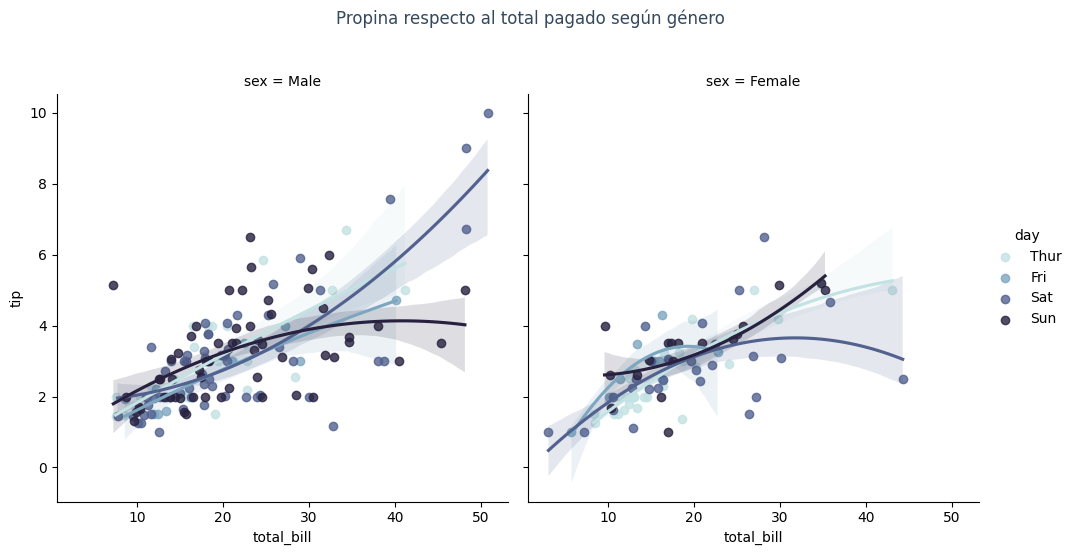

In [87]:
# Crear gráfico Limplot para ver si existe correlación entre facturación total con la propina
# visualizamos si dejan más propinas según el género
plt.figure(figsize=(14, 6))
sns.lmplot(x = "total_bill", y="tip", data=df, hue='day', col='sex',order=2, ci=80, palette="ch:start=.2,rot=-.3")
font_title = {'family': 'sans-serif', 'color':  '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle("Propina respecto al total pagado según género", y=1.10, fontdict=font_title)

# Muestra el gráfico
plt.show()

Conclusión:

- Sin más detalles, observo que la hipótesis planteada es difícil de sacar conclusiones definitivas. No veo una tendencia clara de correlación entre las variables de género, día y las otras dos variables.

- En el caso de los hombres, el sábado y jueves son los días que la línea de regresión es recta o ligeramente curva, y se podría decir que sí, que esos dos días podría darse el caso de que gastan más y dejan mejores propinas. Además, el sábado es el día que los hombres son más propensos a visitar el establecimiento.

- Por otro lado, en el caso de las mujeres, los días que hay más correlación son los jueves y los domingos, cuanto mayor es la cuenta, mayor es la propina. Aunque parece que la mayor concentración está entre el jueves, sábado y domingo. En cambio, el sábado es el día que menos suelen gastar, por tanto, es el día que menos propina dejan.


## **5. ¿Como es esta correlación entre propina y cuenta en función de si es horario de comida o de cena?**

<Figure size 1400x600 with 0 Axes>

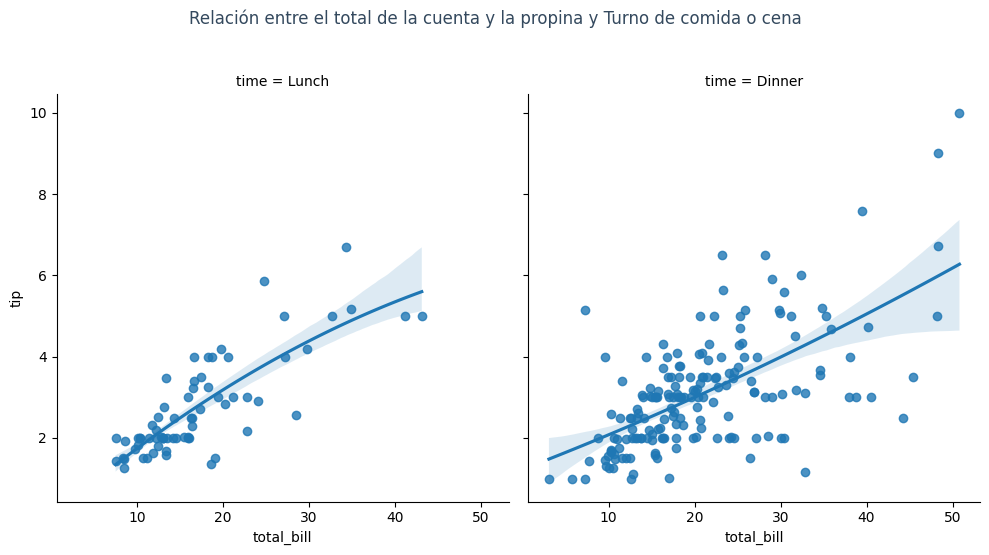

In [88]:
# Crear gráfico Limplot para ver si existe correlación entre facturación total con la propina
# visualizamos si por la cena o comidas gastan más y dejan más propinas
plt.figure(figsize=(14, 6))
sns.lmplot(x='total_bill', y='tip', data=df, col='time',order=2, ci=80, palette='ch:start=.2,rot=-.3')
font_title = {'family': 'sans-serif', 'color':  '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle("Relación entre el total de la cuenta y la propina y Turno de comida o cena", y=1.10, fontdict=font_title)


# Muestra el gráfico
plt.show()

Respuesta:Se podría concluir que existe una correlación positiva entre la propina y la cuenta total, y que esta correlación parece ser más fuerte durante la cena debido a las facturas y propinas más altas.

## **BONUS**: Dibuja un gráfico a tu elección con 2 variables numéricas y 2 categóricas (SUGERENCIA: utiliza `hue` y `style`). ¿Te parece útil?

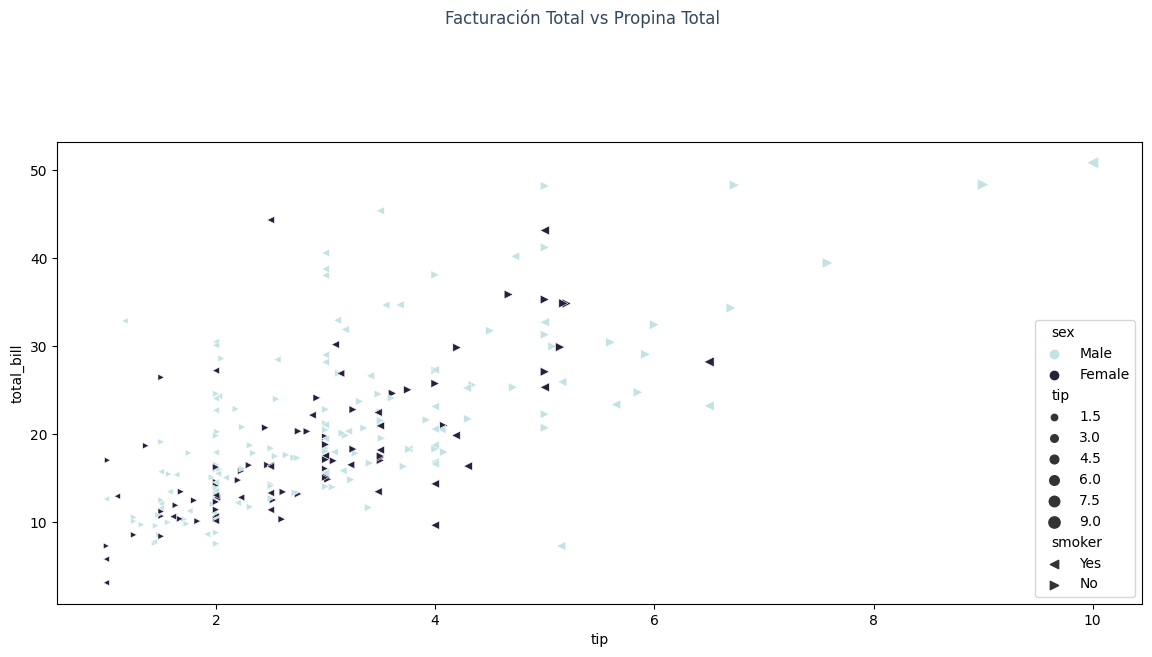

In [142]:

#cambiar formato style
estilos = {'Yes': '<', 'No': '>'}

#crear gráfico
plt.figure(figsize=(14,6))
sns.scatterplot(x='tip', y="total_bill", hue='sex', style = "smoker",markers = estilos, palette='ch:start=.2,rot=-.3', data=df ,size=df["tip"])
font_title = {'family': 'sans-serif', 'color':  '#34495e', 'weight': 'bold', 'size': 12}
plt.suptitle("Facturación Total vs Propina Total", y=1.10, fontdict=font_title)

plt.show()

este gráfico es útil para visualizar la relación entre las variables numéricas total_bill y tip, teniendo en cuenta las variables categóricas sex y smoker.

En general, un gráfico de dispersión es una buena opción para visualizar la relación entre dos variables numéricas.

En definitiva, este gráfico es útil porque nos permite ver la relación entre las dos variables numéricas, total_bill y tip, teniendo en cuenta las dos variables categóricas, sex y smoker. Podemos ver que, en general, las personas dan propinas más altas cuando la cuenta total es más alta. También podemos ver que hay algunas diferencias entre los grupos de sexo y fumadores. Por ejemplo, las mujeres tienden a dar propinas más altas que los hombres, y los fumadores tienden a dar propinas más bajas que los no fumadores.

## **En funcion de todos tus calculos:**

¿Qué día, en qué horario (cena o comida) y en qué zona del restaurante (fumadores no fumadores) elegirias trabajar?

Respuesta: Dia el Sábado en turno de cena, y mejor en la zona de no fumadores, ya que  dejan mejores propinas, porque la facturación total es más alta.